In [2]:
import numpy
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.utils import np_utils 
from keras import backend as K 


In [3]:
from keras.datasets import cifar10
# let's load data 
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [4]:
#normalizing inputs from 0-255 to 0.0-1.0 
X_train = X_train.astype('float32') 
X_test = X_test.astype('float32') 
X_train = X_train / 255.0 
X_test = X_test / 255.q

In [5]:
# one hot encode outputs 
y_train = np_utils.to_categorical(y_train) 
y_test = np_utils.to_categorical(y_test) 
num_classes = y_test.shape[1]

In [93]:
y_train.shape

(50000, 10)

In [7]:
# Create the model 
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(32,32,3), activation='relu', padding='same')) 
model.add(Dropout(0.2)) 
model.add(Conv2D(32, (3, 3), activation='relu', padding='same')) 
model.add(MaxPooling2D(pool_size=(2, 2))) 
model.add(Conv2D(64, (3, 3), activation='relu', padding='same')) 
model.add(Dropout(0.2)) 
model.add(Conv2D(64, (3, 3), activation='relu', padding='same')) 
model.add(MaxPooling2D(pool_size=(2, 2))) 
model.add(Conv2D(128, (3, 3), activation='relu', padding='same')) 
model.add(Dropout(0.2)) 
model.add(Conv2D(128, (3, 3), activation='relu', padding='same')) 
model.add(MaxPooling2D(pool_size=(2, 2))) 
model.add(Flatten()) 
model.add(Dropout(0.2)) 
model.add(Dense(1024, activation='relu', kernel_constraint=maxnorm(3))) 
model.add(Dropout(0.2)) 
model.add(Dense(512, activation='relu', kernel_constraint=maxnorm(3))) 
model.add(Dropout(0.2)) 
model.add(Dense(num_classes, activation='softmax'))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 dropout_1 (Dropout)         (None, 16, 16, 64)        0         
                                                        

In [15]:
# Compile model 
lrate = 0.01 

# sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False) 
# model.compile(loss='categorical_crossentropy', optimizer='adam', epochs=20, metrics=['accuracy'])
# optimum=Adam(learning_rate=0.001)
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [18]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=150, batch_size=32) 
scores = model.evaluate(X_test, y_test, verbose=0)

model.save('cifar-10-2.h5')
print("Accuracy: %.2f%%" % (scores[1]*100))

Epoch 1/150
1563/1563 [==============================] - 16s 10ms/step - loss: 0.4009 - accuracy: 0.8683 - val_loss: 0.6607 - val_accuracy: 0.8023
Epoch 2/150
1563/1563 [==============================] - 11s 7ms/step - loss: 0.3915 - accuracy: 0.8757 - val_loss: 0.6161 - val_accuracy: 0.8104
Epoch 3/150
1563/1563 [==============================] - 11s 7ms/step - loss: 0.3880 - accuracy: 0.8738 - val_loss: 0.6425 - val_accuracy: 0.8065
Epoch 4/150
1563/1563 [==============================] - 11s 7ms/step - loss: 0.4032 - accuracy: 0.8700 - val_loss: 0.6371 - val_accuracy: 0.7999
Epoch 5/150
1563/1563 [==============================] - 11s 7ms/step - loss: 0.3980 - accuracy: 0.8707 - val_loss: 0.6246 - val_accuracy: 0.8089
Epoch 6/150
1563/1563 [==============================] - 11s 7ms/step - loss: 0.3851 - accuracy: 0.8773 - val_loss: 0.6343 - val_accuracy: 0.8076
Epoch 7/150
1563/1563 [==============================] - 11s 7ms/step - loss: 0.3795 - accuracy: 0.8762 - val_loss: 0.6455 

In [34]:
from keras.models import load_model 
model = load_model('cifar-10-2.h5')

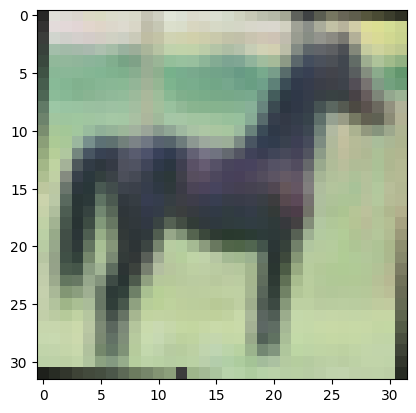

In [82]:
import numpy as np 
from keras.preprocessing import image
import keras.utils as image
test_image1 =image.load_img(r"C:\Users\User\Desktop\IT\AI_python\nn\train_test\test\test\83519.png", target_size =(32,32))
plt.imshow(test_image1)


In [83]:
test_image =image.img_to_array(test_image1) 
test_image =np.expand_dims(test_image, axis =0) 
result = model.predict(test_image) 
print(result) 
if result[0][0]==1: 
    print("Aeroplane") 
elif result[0][1]==1: 
    print('Automobile') 
elif result[0][2]==1: 
    print('Bird') 
elif result[0][3]==1: 
    print('Cat') 
elif result[0][4]==1: 
    print('Deer') 
elif result[0][5]==1: 
    print('Dog') 
elif result[0][6]==1: 
    print('Frog') 
elif result[0][7]==1: 
    print('Horse') 
elif result[0][8]==1: 
    print('Ship') 
elif result[0][9]==1: 
    print('Truck') 
else: 
    print('Error')

1/1 [==============================] - 0s 17ms/step
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]
Horse
